In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df = pd.read_csv('../data/all_data.csv',index_col=0 )
df

,movie_id,primary_title,original_title,start_year,genres,average_rating,num_votes,persons_name,persons_job,title_norm_movie_info,...,production_budget,domestic_gross,worldwide_gross,title_norm_genre_long,genre,new_budget_api,new_ww_revenue_api,imdb_id,vote_average,vote_count
0,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Fantasy,200000000.00,1025467110.00,tt1014759,6.60,12255.00
1,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Family,200000000.00,1025467110.00,tt1014759,6.60,12255.00
2,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Johnny Depp,actor,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Adventure,200000000.00,1025467110.00,tt1014759,6.60,12255.00
3,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Helena Bonham Carter,actress,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Fantasy,200000000.00,1025467110.00,tt1014759,6.60,12255.00
4,tt1014759,Alice in Wonderland,Alice in Wonderland,2010,"Adventure,Family,Fantasy",6.50,358813,Helena Bonham Carter,actress,alice in wonderland 2010,...,200000000,334191110,1025491110,alice in wonderland 2010,Family,200000000.00,1025467110.00,tt1014759,6.60,12255.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34028,tt3829266,The Predator,The Predator,2018,"Action,Adventure,Sci-Fi",5.40,94888,Jacob Tremblay,actor,the predator 2018,...,88000000,51024708,159487563,the predator 2018,Sci-Fi,88000000.00,160542134.00,tt3829266,5.60,3786.00
34029,tt3829266,The Predator,The Predator,2018,"Action,Adventure,Sci-Fi",5.40,94888,Jacob Tremblay,actor,the predator 2018,...,88000000,51024708,159487563,the predator 2018,Adventure,88000000.00,160542134.00,tt3829266,5.60,3786.00
34030,tt3829266,The Predator,The Predator,2018,"Action,Adventure,Sci-Fi",5.40,94888,Trevante Rhodes,actor,the predator 2018,...,88000000,51024708,159487563,the predator 2018,Action,88000000.00,160542134.00,tt3829266,5.60,3786.00
34031,tt3829266,The Predator,The Predator,2018,"Action,Adventure,Sci-Fi",5.40,94888,Trevante Rhodes,actor,the predator 2018,...,88000000,51024708,159487563,the predator 2018,Sci-Fi,88000000.00,160542134.00,tt3829266,5.60,3786.00


In [3]:
df_genre_pb = df[['genre','new_budget_api']]
df_genre_pb

,genre,new_budget_api
0,Fantasy,200000000.00
1,Family,200000000.00
2,Adventure,200000000.00
3,Fantasy,200000000.00
4,Family,200000000.00
...,...,...
34028,Sci-Fi,88000000.00
34029,Adventure,88000000.00
34030,Action,88000000.00
34031,Sci-Fi,88000000.00


In [136]:
df_genre_pb_avg = df_genre_pb.groupby(by='genre').mean().reset_index()[['genre','new_budget_api']]
df_genre_pb_avg.sort_values(by='new_budget_api', ascending = False , inplace = True)

In [137]:
df_genre_pb_avg.new_budget_api = df_genre_pb_avg.new_budget_api.head(10) / 1000000
df_genre_pb_avg.new_budget_api.head(10)

1    111.53
2    100.30
15    98.28
9     92.42
0     85.52
8     70.92
16    58.29
20    56.25
4     43.74
10    40.24
Name: new_budget_api, dtype: float64

In [142]:
df_genre_pb_avg.genre.head(10)

1     Adventure
2     Animation
15       Sci-Fi
9       Fantasy
0        Action
8        Family
16      Singing
20      Western
4        Comedy
10      History
Name: genre, dtype: object

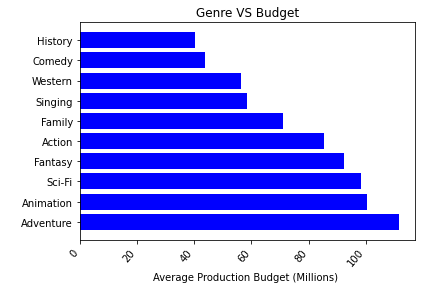

In [141]:
fig,ax = plt.subplots()
plt.xticks(rotation=50, ha="right")
ax.ticklabel_format(style='plain')



x = df_genre_pb_avg.genre.head(10)
height = df_genre_pb_avg.new_budget_api.head(10)

ax.barh(y = x , width = height, color='blue')
ax.set_xlabel('Average Production Budget (Millions) ')
ax.set_ylabel(' ')
ax.set_title('Genre VS Budget');

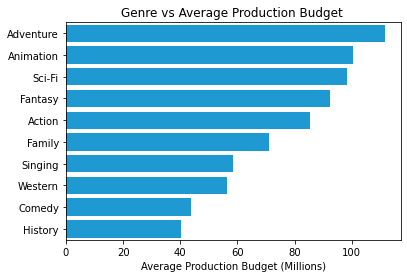

In [148]:
plot = sns.barplot(x = height , y = x, data = df_genre_pb_avg, orient = 'h', color = '#00A4EF');
plot.set_xlabel('Average Production Budget (Millions)')
plot.set_ylabel('')
plot.set_title('Genre vs Average Production Budget ');

In [78]:
#According to the bar graph above, we can say that Action,Adventure,

In [111]:
df_genre_pb_median = df_genre_pb.groupby(by='genre').median().reset_index()[['genre','new_budget_api']]
df_genre_pb_median.sort_values(by='new_budget_api', ascending = True , inplace = True)

In [112]:
df_genre_pb_median.new_budget_api =df_genre_pb_median.new_budget_api / 1000000

In [113]:
df_genre_pb_median.genre

6     Documentary
11         Horror
13        Mystery
17          Sport
19            War
12          Music
14        Romance
18       Thriller
7           Drama
3       Biography
4          Comedy
5           Crime
10        History
20        Western
8          Family
0          Action
9         Fantasy
16        Singing
2       Animation
15         Sci-Fi
1       Adventure
Name: genre, dtype: object

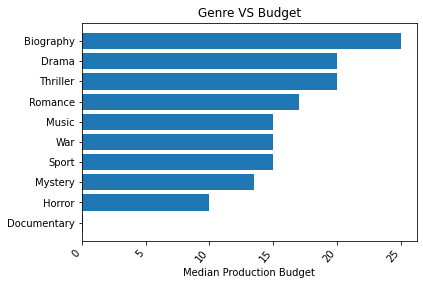

In [114]:
fig,ax = plt.subplots()
plt.xticks(rotation=50, ha="right")
ax.ticklabel_format(style='plain')



x = df_genre_pb_median.genre.head(10)
height = df_genre_pb_median.new_budget_api.head(10)

ax.barh(y = x , width = height, )
ax.set_xlabel('Median Production Budget')
ax.set_ylabel('')
ax.set_title('Genre VS Budget');